<a href="https://colab.research.google.com/github/anaynasingh/ML-Projects/blob/credit-card-fraud-detection-new/Credit_Card_Fraud_Detection_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [305]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [306]:
#loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcardinfo.csv')

In [307]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [308]:
#last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [309]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [310]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [311]:
#distribution of legit transaction and fraudulent transaction
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unbalanced

0 --> Normal Transaction
1 --> Fraudulent Transaction

In [312]:
#seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [313]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [314]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [315]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [316]:
#compare values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


This is a case of Under-Sampling. We have to build a sample datset containing similar distribution of normal transactions and fraudulent transactions.

Number of fraudulent Transactions -->492

In [317]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [318]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)


In [319]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
197587,132087.0,2.028219,-1.143995,-1.722732,-0.442873,-0.064551,0.318910,-0.348537,-0.111965,-0.224763,0.848429,-0.984331,0.790943,0.799725,-0.293591,-2.257320,-1.793661,-0.261110,1.433165,0.437642,-0.371834,-0.297047,-0.171495,-0.192825,-1.302017,0.267364,0.900202,-0.064072,-0.077189,99.00,0
235640,148478.0,-0.688011,0.587630,-0.154900,-1.590002,0.315218,-1.270510,0.802914,0.042490,-1.768516,-0.317343,-1.535857,-0.108434,0.214333,0.456886,-1.370508,-1.870259,0.115918,0.559795,-1.257692,-0.675337,-0.227806,-0.259700,-0.245841,-0.058531,0.197081,0.505550,-0.076419,0.031078,12.15,0
18894,29848.0,-1.062843,-1.017016,1.510200,-1.153919,0.554183,0.829903,0.404056,0.144726,0.618039,-0.893047,-0.702019,0.618760,0.611566,-0.904447,-1.572100,0.735997,-1.174706,0.479827,0.651478,0.625965,-0.119186,-0.524687,0.187666,-1.340389,0.215512,0.837993,-0.300549,-0.219780,192.88,0
119430,75440.0,0.286357,-1.739699,-0.661246,0.306156,-0.808369,-0.482463,0.699019,-0.206567,0.156771,-0.292948,0.776662,0.431728,-0.936029,0.638067,-0.366407,0.067480,-0.226111,0.059965,0.621213,0.923178,0.243935,-0.399010,-0.583915,0.100521,0.335721,1.073285,-0.203941,0.066529,521.00,0
37977,39194.0,1.057391,-0.854105,1.134898,0.811819,-1.574058,-0.174816,-0.843187,0.041459,-0.300440,0.685426,-0.999271,-0.133319,0.087010,-0.325666,0.479797,-1.189168,-0.145289,1.609134,-1.278918,-0.327824,-0.173369,-0.129427,-0.103279,0.362435,0.343640,-0.251889,0.070122,0.059906,120.00,0


In [320]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [321]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [322]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,99302.260163,0.000670,-0.092867,-0.135619,-0.100472,0.081966,0.008490,-0.053643,-0.030094,-0.001889,0.076416,0.032471,0.040631,-0.078267,0.025714,0.021607,-0.079512,-0.023008,-0.009647,-0.039836,0.029367,-0.023315,-0.028256,-0.045115,0.014457,-0.004730,0.018831,-0.003395,0.009384,94.747093
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features and Targets

In [323]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [324]:
print(X)

            Time        V1        V2  ...       V27       V28  Amount
197587  132087.0  2.028219 -1.143995  ... -0.064072 -0.077189   99.00
235640  148478.0 -0.688011  0.587630  ... -0.076419  0.031078   12.15
18894    29848.0 -1.062843 -1.017016  ... -0.300549 -0.219780  192.88
119430   75440.0  0.286357 -1.739699  ... -0.203941  0.066529  521.00
37977    39194.0  1.057391 -0.854105  ...  0.070122  0.059906  120.00
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]


In [325]:
print(Y)

197587    0
235640    0
18894     0
119430    0
37977     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data and Testing Data

In [326]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [327]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training


Decision Tree

In [328]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [329]:
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(dt_pred, Y_test)
print('Accuracy score of Decision Tree model:',dt_accuracy )


Accuracy score of Decision Tree model: 0.9086294416243654


K-Nearest Neighbors

In [330]:
n = 6
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=6)

In [331]:
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(knn_pred, Y_test)
print('Accuracy score of K-Nearest Neighbors:', knn_accuracy)

Accuracy score of K-Nearest Neighbors: 0.6548223350253807


Logistic Regression

In [332]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [333]:
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(lr_pred,Y_test )
print('Accuracy score of Logistic Regression is:', lr_accuracy)

Accuracy score of Logistic Regression is: 0.934010152284264


Support Vector Machine

In [334]:
from sklearn.svm import SVC
svmm = SVC(random_state = 1)
svmm.fit(X_train, Y_train)

SVC(random_state=1)

In [335]:
svmm_pred = svmm.predict(X_test)
svmm_accuracy = accuracy_score(svmm_pred, Y_test)
print('Accuracy score of SVM is:', svmm_accuracy)

Accuracy score of SVM is: 0.5634517766497462


Random Forest Classification

In [336]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [337]:
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(rf_pred, Y_test)
print('Accuracy score of Random Forest Classification is:', rf_accuracy)

Accuracy score of Random Forest Classification is: 0.9289340101522843


XG Boost Classification

In [338]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, Y_train)

XGBClassifier(max_depth=4)

In [339]:
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(xgb_pred, Y_test)
print('Accuracy score of XG Boost Classification is:', xgb_accuracy)

Accuracy score of XG Boost Classification is: 0.9187817258883249


Plotting a bar graph to show the accuracy scores of the different models

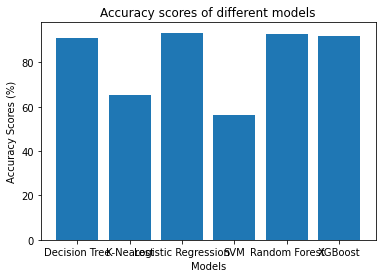

In [340]:
plt.title('Accuracy scores of different models')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores (%)')
models = ['Decision Tree', 'K-Nearest', 'Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
labels = [dt_accuracy*100, knn_accuracy*100, lr_accuracy*100, svmm_accuracy*100, rf_accuracy*100, xgb_accuracy*100]
plt.bar(models, labels)
plt.show()

From the above graph we can conclude that Logistic Regression had the highest accuracy rate.

In [341]:
print(dt_accuracy*100, knn_accuracy*100, lr_accuracy*100, svmm_accuracy*100, rf_accuracy*100, xgb_accuracy*100)

90.86294416243655 65.48223350253807 93.4010152284264 56.34517766497462 92.89340101522842 91.87817258883248
